In [127]:
import pandas as pd
from pandas import DataFrame


In [128]:
#Question 1
##Handle duplicate values in Panda data frame
raw_data = {'first_name': ['A', 'A','B', 'C','D'], 
        'last_name': ['E','E' ,'F', 'G','H'], 
        'age': [10, 10,21, 30, 36]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age'])
df




,first_name,last_name,age
0,A,E,10
1,A,E,10
2,B,F,21
3,C,G,30
4,D,H,36


In [129]:
#drop the duplicates
df.duplicated()
df.drop_duplicates()

,first_name,last_name,age
0,A,E,10
2,B,F,21
3,C,G,30
4,D,H,36


In [130]:
#handle duplicates in  specific columns
df.drop_duplicates(['first_name'], keep='last')

,first_name,last_name,age
1,A,E,10
2,B,F,21
3,C,G,30
4,D,H,36


In [131]:
#2nd case: handle duplicated values in python list
dupli = [1, 2, 3, 1, 2, 5, 6, 6,7, 8]
dupli

[1, 2, 3, 1, 2, 5, 6, 6, 7, 8]

In [132]:
#create an empty new non-duplicate list, append non-repetitive values to this new list 
nodupli = []
for i in dupli:
    if i not in nodupli:
        nodupli.append(i)
nodupli
    

[1, 2, 3, 5, 6, 7, 8]

In [145]:
#3rd case:handle duplicate values in numpy array
import numpy as np
dupli = np.array([1,1,1,2,2,3,3])
print dupli
unique = np.unique(dupli)
print unique


[1 1 1 2 2 3 3]
[1 2 3]


In [146]:
#additional: handle duplicate rows in higher dimension 
dupli2 = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(dupli2, axis=0)



array([[1, 0, 0],
       [2, 3, 4]])

In [169]:
#Question 2 in python

friend_request = pd.DataFrame(
    {"requester_id":[1,2,3,3],
     "time":['11/3/2017','11/4/2017','11/5/2017','11/5/2017'],
     "sent_to_id":[4,5,6,6]}
)






In [170]:
request_accepted = pd.DataFrame(
    {"requester_id":[1,3],
     "time":['11/3/2017','11/5/2017'],
     "acceptor_id":[4,6]}
)
request_accepted
#pd.merge(friend_request,request_accepted,how = 'left', left_index=True, on = 'requestor_id')

,acceptor_id,requester_id,time
0,4,1,11/3/2017
1,6,3,11/5/2017


In [180]:
join = pd.merge(friend_request,request_accepted,how="left",left_on=["requester_id", "sent_to_id"], \
             right_on=["requester_id", "acceptor_id"])
len(join["acceptor_id"][join.acceptor_id > 0])/float(len(join["acceptor_id"]))

1.0

In [181]:
#Question 2 in sql
#Possible case:
#1.There might be a case where a sender sends multiple requests to the same receiver, and a request could be accepted more than once.
#2.If there are no requests the output will contain Null.

#%load_ext sql
#SELECT  IFNULL((sum(case when a.accepter_id > 0 then 1 else 0 end) / count(*)), 0) as accept_rate
#FROM (select distinct sender_id, send_to_id from friend_request) r
#LEFT JOIN  (select distinct requester_id, accepter_id from request_accepted) a ON r.sender_id = a.requester_id and r.send_to_id = a.accepter_id;


In [43]:
#Question 3
def which_CC(cc):
  if (cc[0:4] in['4026', '4405', '4508', '4844', '4913', '4917']):
      return 'VISAELECTRON'
  if (cc[0:6] == '417500'):
      return 'VISAELECTRON'
  if (cc[0] == '4') and (len(cc) == 16):
    return 'Visa'
  if (cc[0:2] == '34' or cc[0:2] == '37') and (len(cc) == 15):
     return 'AMEX'
  if (cc[0:2] == '36') and (len(cc) == 41714):
    return 'Diners Club'
  else:
    return 'Fail to identify the issuer with condition given'

cc = raw_input('input the credit card number:')
print which_CC(cc)


input the credit card number:123
Fail to identify the issuer


In [1]:
#Additional homework question
import datetime
import numpy as np
import pandas as pd
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
file_location = "/Users/zengxiangyu/Downloads/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)
#convert the date to standard format
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.date.head()
my_data.head(10)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS
5,FR,2017-04-06,12624548,2887851716418524034,10.641677,15563614621402392174,ANDROID_APPS
6,US,2017-04-06,12624548,8835194413765780524,9.990000,793284520969747371,ANDROID_APPS
7,US,2017-04-02,12624549,2761291987218019434,10.090000,4877509876568871706,MUSIC
8,US,2017-04-05,12624548,9027895522629963459,9.990000,3647559719307779196,ANDROID_APPS
9,US,2017-04-05,12624548,2588200289165850850,19.990000,3647559719307779196,ANDROID_APPS


In [2]:
#obtain the series for given date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

# for two given series, plot the time series
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()

# main function discussed in class
def PrintDailyTimeSeries(my_data, experiment_ids):
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0])
    control_series = GetSeries(my_data, experiment_ids[1])
    
    #plot the data
    PlotSeries(treatment_series, control_series)

In [119]:
# printDailytimeseries function that is discussed in class
def PrintDailyTimeSeries(my_data,experiment_ids):
    date_series = my_data.date
    index_series = np.unique(date_series) # find unique dates 
    index_series = np.sort(index_series)  #sort by those dates
    # group the data
    my_data = my_data.sort_values('date',ascending = True,inplace = False)
    treatment_series = GetSeries(my_data,experiment_ids[0])
    control_series = GetSeries(my_data,experiment_ids[1])

    PlotSeries(treatment_series,control_series)
    

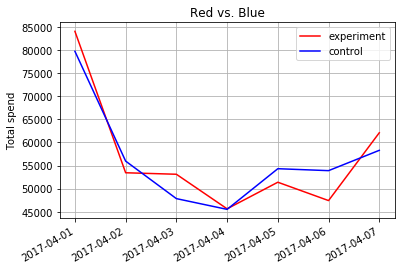

In [3]:
#plot out the data
PrintDailyTimeSeries(my_data,[12624548,12624549])

In [6]:
# for additional homework, make PrintCumulativeTimeSeries() function
def ObtainCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) 
                                           & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    cumsum = np.cumsum(series)
    revenue = cumsum[-1]
    return((series, revenue))
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = ObtainCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = ObtainCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = ObtainCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = ObtainCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Overall % uplift on revenue, experiment vs.control: " + 
          str((treatment_revenue-control_revenue)/(control_revenue)) + "%")
    PlotSeries(treatment_series, control_series)

Overall % uplift on revenue, experiment vs.control: -0.0446580818945%


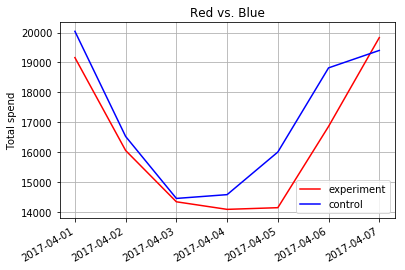

In [7]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US")